# tic-tac-toe
## Problem Statement:-
This database encodes the complete set of possible board configurations at the end of tic-tac-toe games, where "x" is assumed to have played first. The target concept is "win for x" (i.e., true when "x" has one of 8 possible ways to create a "three-in-a-row").

###  We will explore the problem in following stages:
1. Data Exploration 
2. Data Cleaning 
3. Feature Engineering
4. Model Building

### Dataset description
The dataset has 958 entries with 10 columns.The description of each columns is given below:
columns named form V1 to V10

### Import the necessary libraries

In [12]:
# importing the necessary packages to process or plot the data
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [13]:
# importing os library
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Data Exploration

### Read the csv file with the help of pandas read_csv function

In [14]:
# with the help of pandas read the csv file
df = pd.read_csv('tic-tac-toe-endgame.csv')

# using the head function see what is originlly present in the dataset
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
5,x,x,x,x,o,o,b,b,o,positive
6,x,x,x,x,o,b,o,o,b,positive
7,x,x,x,x,o,b,o,b,o,positive
8,x,x,x,x,o,b,b,o,o,positive
9,x,x,x,x,b,o,o,o,b,positive


### Shape of the dataset

In [15]:
# shape method gives the shape of dataframe
df.shape

(958, 10)

### Size of the dataset

In [16]:
# size method gives the size of dataframe (like rows*columns)
df.size

9580

### Description of all particular column of the dataset

In [17]:
# descrbe function gives the detailed description of dataframe
df.describe(include='all')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
count,958,958,958,958,958,958,958,958,958,958
unique,3,3,3,3,3,3,3,3,3,2
top,x,x,x,x,x,x,x,x,x,positive
freq,418,378,418,378,458,378,418,378,418,626


## Data Cleaning

### To check the null values in the dataset

In [18]:
# to see which column have null values use .isnull() ,as we can see two columns have lots of missing values.
df.isnull().sum()

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
dtype: int64

## Feature Engineering

### Factorizing each representation to numeric form

In [19]:
# factorizing each sign in each column
df['V1'],v1 = pd.factorize(df['V1'], sort=True)
df['V2'],v2 = pd.factorize(df['V2'], sort=True)
df['V3'],v3 = pd.factorize(df['V3'], sort=True)
df['V4'],v4 = pd.factorize(df['V4'], sort=True)
df['V5'],v5 = pd.factorize(df['V5'], sort=True)
df['V6'],v6 = pd.factorize(df['V6'], sort=True)
df['V7'],v7 = pd.factorize(df['V7'], sort=True)
df['V8'],v8 = pd.factorize(df['V8'], sort=True)
df['V9'],v9 = pd.factorize(df['V9'], sort=True)
df['V10'],v10 = pd.factorize(df['V10'], sort=True)
print(v1, v2, v3, v4, v5, v6, v7, v8, v9, v10)
print(df)

Index(['b', 'o', 'x'], dtype='object') Index(['b', 'o', 'x'], dtype='object') Index(['b', 'o', 'x'], dtype='object') Index(['b', 'o', 'x'], dtype='object') Index(['b', 'o', 'x'], dtype='object') Index(['b', 'o', 'x'], dtype='object') Index(['b', 'o', 'x'], dtype='object') Index(['b', 'o', 'x'], dtype='object') Index(['b', 'o', 'x'], dtype='object') Index(['negative', 'positive'], dtype='object')
     V1  V2  V3  V4  V5  V6  V7  V8  V9  V10
0     2   2   2   2   1   1   2   1   1    1
1     2   2   2   2   1   1   1   2   1    1
2     2   2   2   2   1   1   1   1   2    1
3     2   2   2   2   1   1   1   0   0    1
4     2   2   2   2   1   1   0   1   0    1
5     2   2   2   2   1   1   0   0   1    1
6     2   2   2   2   1   0   1   1   0    1
7     2   2   2   2   1   0   1   0   1    1
8     2   2   2   2   1   0   0   1   1    1
9     2   2   2   2   0   1   1   1   0    1
10    2   2   2   2   0   1   1   0   1    1
11    2   2   2   2   0   1   0   1   1    1
12    2   2   2 

### Again glancing the dataset

In [20]:
# again checking the dataset
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,2,2,2,2,1,1,2,1,1,1
1,2,2,2,2,1,1,1,2,1,1
2,2,2,2,2,1,1,1,1,2,1
3,2,2,2,2,1,1,1,0,0,1
4,2,2,2,2,1,1,0,1,0,1
5,2,2,2,2,1,1,0,0,1,1
6,2,2,2,2,1,0,1,1,0,1
7,2,2,2,2,1,0,1,0,1,1
8,2,2,2,2,1,0,0,1,1,1
9,2,2,2,2,0,1,1,1,0,1


In [21]:
# give the classes of column V10
class_names = [v10[0], v10[1]]
class_names

['negative', 'positive']

### Data splitting

In [22]:
# splitting the data for applicaiton of model
x = df.drop('V10',axis=1)
y = df['V10']

# Split the data into test and train test
x_train, x_test, y_train, y_test = train_test_split(x, y)
[x_train.shape, x_test.shape, y_train.shape, y_test.shape]

[(718, 9), (240, 9), (718,), (240,)]

## EDA

### Funciton for plotting mean accurancy and point accuracy

In [23]:
# defining mean accuracy function
def classify_mean_accuracy(max_n, max_c):
    
    max_range = range(1, max_n)
    cases = range(0, max_c)
    funcs = ['relu', 'logistic', 'tanh']
    
    best_func = 'relu'
    best_g_sum = 0
    best_g = 0
    best_g_n = 0
    
    for func in funcs:
        
        best_list = []
        best_sum = 0
        best_c = 0
        best_c_n = 0
        
        for case in cases:
            
            best = 0
            best_n = 0
            accuracy_list = []
            
            for n in max_range:
                mlp = MLPClassifier(solver='lbfgs', activation=func, hidden_layer_sizes=(n))
                mlp.fit(x_train, y_train)
                y_pred = mlp.predict(x_test)
                score = accuracy_score(y_test, y_pred)
                accuracy_list.append(score)
                
                if score > best:
                    best = score
                    best_n = n
            
            accuracy_sum = sum(accuracy_list)
            
            if accuracy_sum > best_sum:
                best_sum = accuracy_sum
                best_list = accuracy_list
                best_c = best
                best_c_n = best_n
                
        if best_sum > best_g_sum:
            best_g_sum = best_sum
            best_g = best_c
            best_g_n = best_c_n
            best_func = func
                
        plt.plot(max_range, best_list, label=func)
    
    plt.title('Activation function: relu x logistic x tanh')
    plt.xlabel('Number of neurons')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()
    
    return (best_g, best_g_n, best_func)

# defining point accuracy function
def classify_point_accuracy(max_n, max_c):
      
    max_range = range(1, max_n)
    cases = range(0, max_c)
    funcs = ['relu', 'logistic', 'tanh']
    colors = ['ro', 'go', 'bo']
    
    best = 0
    best_n = 0
    best_mlp = None
    c = 0
    
    for func in funcs:
        
        color = colors[c]
        c += 1
        
        for case in cases:
            
            accuracy_list = []
            
            for n in max_range:
                mlp = MLPClassifier(solver='lbfgs', activation=func, hidden_layer_sizes=(n))
                mlp.fit(x_train, y_train)
                y_pred = mlp.predict(x_test)
                score = accuracy_score(y_test, y_pred)
                accuracy_list.append(score)
                
                if score > best:
                    best = score
                    best_n = n
                    best_mlp = mlp
            
            plt.plot(max_range, accuracy_list, color, label='{}{}'.format(func, case))
    
    plt.title('Activation function: relu x logistic x tanh')
    plt.xlabel('Number of neurons')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()
    
    return (best, best_n, best_mlp)

### Mean accuracy plot

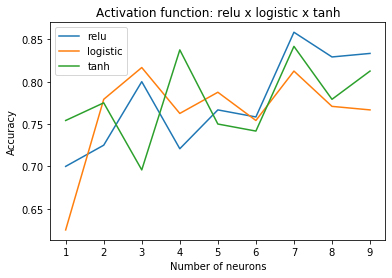

(0.8583333333333333, 7, 'relu')

In [24]:
# mean accuracy plot the neurons vs accuracy to check best amount of neurons
best_mean_results = classify_mean_accuracy(10, 10) # usually the best amount of neurons is found between the input and output size. Only one hidden layer is required for most feedback neural networks
best_mean_results

### Point accuracy plot

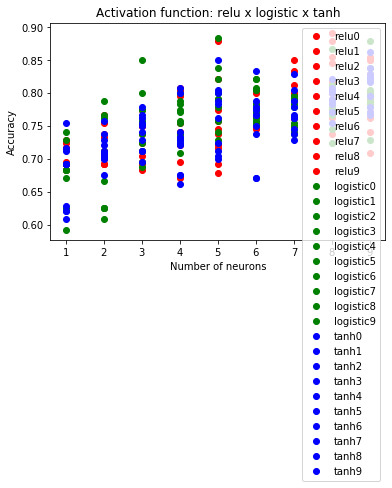

(0.8916666666666667,
 8,
 MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
               beta_2=0.999, early_stopping=False, epsilon=1e-08,
               hidden_layer_sizes=8, learning_rate='constant',
               learning_rate_init=0.001, max_iter=200, momentum=0.9,
               n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
               random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
               validation_fraction=0.1, verbose=False, warm_start=False))

In [25]:
# point accuracy plot the neurons vs accuracy to check best amount of neurons
best_point_results = classify_point_accuracy(10, 10) # usually the best amount of neurons is found between the input and output size. Only one hidden layer is required for most feedback neural networks
best_point_results

## Application of Model

In [26]:
# First try out the best punctual accuracy mlp found. It usually brings results of at least 85%
mlp = best_point_results[2]

In [27]:
# use the model to make predictions wih the test data
y_pred = mlp.predict(x_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}/{}'.format(count_misclassified, len(y_test)))
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))
print(confusion_matrix(y_test, y_pred))

Misclassified samples: 26/240
Accuracy: 0.89
[[ 58  16]
 [ 10 156]]


In [28]:
# Second try out the best mean accuracy data into a new mlp and check results. They are usually at least 75%
mlp = MLPClassifier(solver='lbfgs', activation=best_mean_results[2], hidden_layer_sizes=best_mean_results[1])
mlp.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=7, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [30]:
# use the model to make predictions with the test data
y_pred = mlp.predict(x_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}/{}'.format(count_misclassified, len(y_test)))
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))
print(confusion_matrix(y_test, y_pred))

Misclassified samples: 35/240
Accuracy: 0.85
[[ 53  21]
 [ 14 152]]


## Conclusion